## Mnist Classfiation

In [1]:
import tensorflow as tf 
import numpy as np 

## 케라스 내장 데이터 셋
- boston_housing : 보스턴 주택 가격
- cifar10 : 이미지 분류
- cifar100 : 이미지 분류 
- mnist : 손글씨
- fashio_mnist : 의류 이미지 데이터
- imdb : 영화데이터(평가글)
- reuters : 뉴스 토픽

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
print(type(mnist))

<class 'module'>


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train : ', x_train.shape, y_train.shape)
print('test : ', x_test.shape, y_test.shape)


11493376/11490434 [==============================] - 2s 0us/step
train :  (60000, 28, 28) (60000,)
test :  (10000, 28, 28) (10000,)


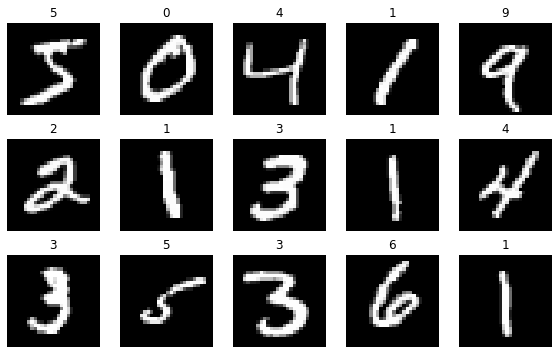

In [42]:
## 데이터 시각화 

import matplotlib.pyplot as plt 

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap = 'gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [7]:
## 데이터 전처리 

x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [9]:
## 픽셀 값의 최소, 최대 값 확인

print(f'정규화 전 최소값 : {x_train.min()}, 최대값: {x_train.max()}')

## 손실함수

정규화 전 최소값 : 0, 최대값: 255


In [12]:
# 데이터 정규화 

x_train = x_train / x_train.max() ## 0과 1 사이로 변환

print(f'정규화 후 최소값 : {x_train.min()}, 최대값: {x_train.max()}')

정규화 후 최소값 : 0.0, 최대값: 1.0


In [14]:
x_test = x_test / x_test.max() ## 나중에 실제 데이터들에도 정규화를 실시해야함 

In [15]:
## 정규화 후 데이터
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [16]:
## flatten 레이어 (reshape같은 것)

print(f'변경 전 shape : {x_train.shape}')
print(f'1D로 shape 변경 : {x_train.reshape(60000, -1).shape} ')

## 28 by 28 매트릭스가 6만개 였다가. 
## 784row 백터로 6만개 만듬

변경 전 shape : (60000, 28, 28)
1D로 shape 변경 : (60000, 784) 


In [17]:
print(f'Faltten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

## reshape을 쓰거나 flatten을 쓰는 것은 자기 맘이다. 

Faltten 적용 후 : (60000, 784)


In [ ]:
# 활성화 함수
## 한번에 제작하는 방법
tf.keras.layers.Dense(units = 128, activation = 'relu') ## 렐루에 통과시키면, 원래 색 데이터를 유지시킬 수 있다. 값대로 들어가기 때문 _/ 이런 식으로 생김

In [18]:
## affine과 activate를 지정해주는 방법
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(128), ## affine function
                    
                            tf.keras.layers.Activation('relu') ## activation function
])

In [22]:
## 입출력 : 마지막 출력수는 몇개로 구분하겠느냐

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    # 마지막 출력 노드 = 10 (분류 갯수)
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [23]:
## 마지막 출력층 노드= 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid') ## 이진 분류에 대한 마지막 설정

## 마지막 출력층 노드 = 10인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')


In [24]:
## 손실함수
## 마지막 출력층 노드= 1인 경우, sigmoid
model.compile(loss = 'binary_crossentropy')

## 마지막 출력층 노드가 여러개인 경우, 원 핫 벡터인 경우[0., 1., 0,.......]
model.compile(loss = 'categorical_crossentropy')


## 마지막 출력층 노드가 여러개인 경우, 원 핫 벡터 아닌 경우
model.compile(loss = 'sparse_categorical_corssentropy')


In [25]:
## 옵티마이저(최적화 알고리즘)
adam = tf.keras.optimizers.Adam(lr = 0.001)

model.compile(optimizer=adam)

## 문자열로 지정도 가능

model.compile(optimizer='adam')

In [31]:
# 평가 지표
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=[acc])

## 문자열로 지정도 가능하다. 
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) ## 레이블에 대한 원핫인코딩을 지원해준다. 


In [32]:
## 훈련
model.fit(x_train, y_train, 
        ## 검증셋 지정
        validation_data = (x_test, y_test),
        epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4799 - accuracy: 0.8527 - val_loss: 0.1458 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.1037 - accuracy: 0.9687 - val_loss: 0.1084 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0704 - accuracy: 0.9777 - val_loss: 0.0945 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0838 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0783 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0753 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0987

NameError: name 'sparse_' is not defined

In [33]:
# 검증 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도 : ', test_acc, test_loss)

313/313 [==============================] - 8s 25ms/step - loss: 0.1000 - accuracy: 0.9766
검증 셋 정확도 :  0.9765999913215637 0.10000594705343246


In [34]:
## sigmoid, softmax는 확률로 결과가 나온다. 
## 예측 

predictions = model.predict(x_test)



In [35]:
predictions.shape

(10000, 10)

In [36]:
print(predictions[0]) ## 0 ~ 9까지 숫자들에 대한 확률

[2.1813284e-15 6.6151440e-09 9.0882715e-09 1.9380272e-08 1.8476882e-08
 1.7342298e-16 1.3900729e-17 1.0000000e+00 1.2984781e-14 1.4919568e-09]


In [37]:
print(np.argmax(predictions[0])) ## 젤좋은값

7


In [38]:
print(np.argmax(predictions[:10], axis = 1))

[7 2 1 0 4 1 4 9 5 9]


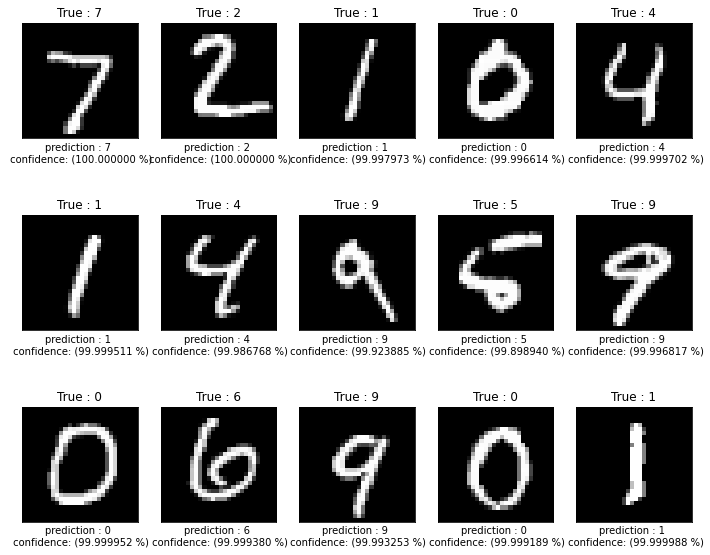

In [41]:
import matplotlib.pyplot as plt 

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
    return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}')
    ax.set_xlabel(f'prediction : {y_pred} \n confidence: ({confidence:2f} %)')
